In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import StochasticNeuralNetwork as SNN

In [5]:
# 1. generate a simple non-linear function
X = np.reshape(np.arange(-5.0, 5.0, 0.01), [-1, 1])
np.random.shuffle(X)

linearity_coeff = 0.0
Y = []
#  make this effect time-varying (relationship will "straighten out" over time)
for t in range(1000):
    linearity_coeff += 0.0002

    y_t = (linearity_coeff * X[t]) + (1 - linearity_coeff) * sp.expit(X[t])
    Y.append(y_t)

Y = np.reshape(np.array(Y), [-1])

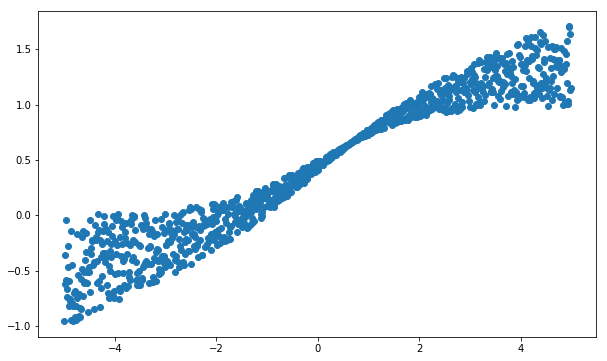

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y)
plt.show()

In [7]:
# 2. neural network
print("Building neural network...")

nn = SNN.StochasticNeuralNetwork([3, 3], 20)
nn.fit(X, Y, samples=1000, advi_n=20000)
y_preds = nn.predict(X)
RMSD = nn.RMSD(X, Y)

print( "Root Mean Square deviation:", RMSD)

Building neural network...


INFO (theano.gof.compilelock): Waiting for existing lock by process '18824' (I am process '19611')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/rosgori/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.6.6-64/lock_dir
Average Loss = -1,252.9: 100%|██████████| 20000/20000 [00:26<00:00, 769.11it/s]
Finished [100%]: Average Loss = -1,253.4
100%|██████████| 1000/1000 [00:23<00:00, 42.78it/s]


Root Mean Square deviation: 0.07687421872356072


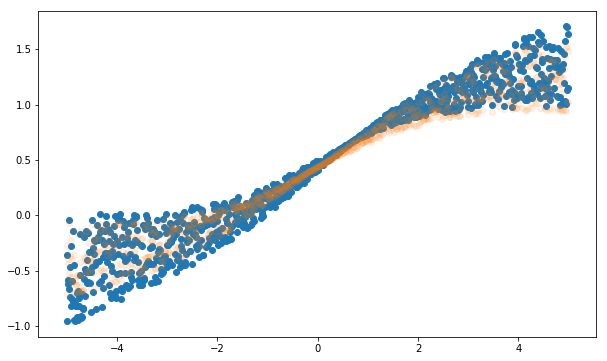

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y)
plt.scatter(X, y_preds, alpha=0.1)
plt.show()

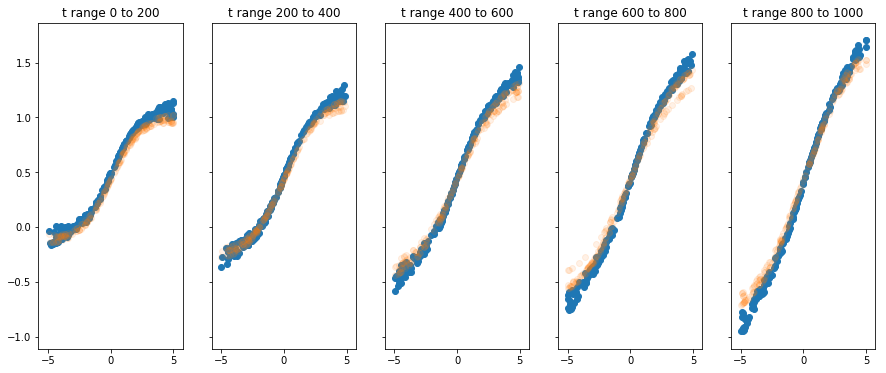

In [9]:
fig, axarr = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(15,6))

for i in range(len(axarr)):
    from_idx = 200 * i
    to_idx = 200 * (i + 1)

    axarr[i].scatter(X[from_idx:to_idx], Y[from_idx:to_idx])
    axarr[i].scatter(X[from_idx:to_idx], y_preds[from_idx:to_idx], alpha=0.1)
    axarr[i].set_title("t range %s to %s" % (from_idx, to_idx))

plt.show()